# WorkFlow
# Load the data
## Clean the data
## Feature Enginnering
## Visualizing the data
## Preproccessing
## Modelling

## Load the data

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import *
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [109]:
data = pd.read_csv('./data/raw/train.csv')
test_data = pd.read_csv('./data/raw/test.csv')
sample_sub = pd.read_csv('./data/raw/sample_submission.csv')

In [110]:
data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


## Clean the data

In [111]:
len(data)

100000

In [112]:
len(test_data)

50000

## Feature Enginnering

In [113]:
class FeatureEnginnering:
    def __init__(self, data, col):
        self.data = data
        self.col = col

    def feature_enginner(
        self, quantile=False, std_and_mean=False, verbose=False
    ) -> "feature enginnerd data":
        if quantile:
            max_no = self.data[self.col].quantile(0.99)
            min_no = self.data[self.col].quantile(0.05)
            data = self.data[self.data[self.col] < max_no]
            data = self.data[self.data[self.col] > min_no]
        if std_and_mean:
            max_no = self.data[self.col].mean() + 3 * self.data[self.col].std()
            min_no = self.data[self.col].mean() + -3 * self.data[self.col].std()
            data = self.data[self.data[self.col] < max_no]
            data = self.data[self.data[self.col] > min_no]
        return data

In [114]:
for col in data.drop(['id','target'],axis=1).columns:
    fe = FeatureEnginnering(data,col)
    data = fe.feature_enginner(quantile=True,std_and_mean=True)

In [115]:
len(data)

100000

In [116]:
fe = FeatureEnginnering(data,'id')
data = fe.feature_enginner(quantile=True,std_and_mean=True)

In [117]:
len(data)

100000

In [118]:
def object_to_int(
        data=pd.DataFrame,
        start_index=-1,
        filepath="./info.json",
        col="index",
        verbose=1,
    ) -> "Return a list and a dictionary of the object cols int converted":
        """
        verbose :
            verbose = 0 = No output
            verbose = 1 = Output
        start_index :
            it just is like the index the convertion starts at.
            ex :
                start_index = -1
                0 : first object
                1 : second object
                so and so forth
        data :
            a pd dataframe with the column
        filepath :
            the filepath that you want to save the info_dict to.
            ex :
            {0:'A',1:'B'}
        col :
            the column that you want transformed
        """
        if data[col].dtype == int or data[col].dtype == float:
            raise f"the columns that you passed are int or float type please passthrough a object type column {data[col].dtype}"
        index = start_index
        info_list = []
        info_dict = {}
        for info in data[col]:
            if info not in info_dict:
                index += 1
                info_dict[info] = index
        for info in data[col]:
            info_list.append(info_dict[info])
        print(info_dict)
        return (index, info_list, info_dict)

In [119]:
def shuffle_data(
        data, how_many_times
    ) -> "Shuffled Data for how many times you wanted":
        """
        data :
            pd.DataFrame
        how_many_times :
            how many times to shuffle
        """
        for _ in range(how_many_times):
            data = data.sample(frac=1)
        return data

In [120]:
shuffle_or_not = False

In [121]:
if shuffle_or_not is True:
    data = shuffle_data(data,100)

## Visualization

<AxesSubplot:>

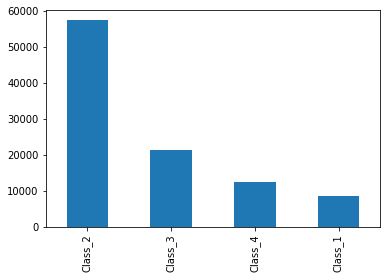

In [122]:
data['target'].value_counts().plot.bar()

In [123]:
sample_sub.head(1)

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25


## Preproccessing

In [124]:
turn_target_to_int = False

In [125]:
if turn_target_to_int is True:
    data['target'] = object_to_int(data=data,col='target',filepath='./output/target.json')[1]

In [126]:
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    LabelEncoder,
    Normalizer,
)

In [127]:
pres = [StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),Normalizer()]

In [128]:
X = data.drop('target',axis=1)
y = data['target']

In [129]:
label_encoder = True

In [130]:
from sklearn.compose import make_column_transformer

In [131]:
X_old = X

In [132]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [133]:
cols = list(X.columns)

In [134]:
y_old = y

In [135]:
# X = X_old
# y = y_old
# for pre in pres:
#     ct = make_column_transformer(
#         (pre,cols)
#     )
#     ct.fit(X)
#     X = ct.transform(X)
#     ohe = OneHotEncoder()
#     ohe.fit(np.array(y).reshape(-1,1))
#     y = ohe.transform(np.array(y).reshape(-1,1))
#     y = np.argmax(y,axis=1)
#     if label_encoder is True:
#         le = LabelEncoder()
#         le.fit(y)
#         y = le.transform(y)
#     print('creating model..')
#     model = GradientBoostingClassifier()
#     print('fitting the model')
#     model.fit(X,y)
#     print('done fitting the model')
#     print(pre)
#     print(model.score(X,y))
#     X = X_old
#     y = y_old

In [136]:
# best without label encoder = MaxAbsScaler 0.579
# best with label encoder = MaxAbsScaler

In [137]:
X = X_old
y = y_old
ct = make_column_transformer(
    (MaxAbsScaler(),cols)
)
ct.fit(X)
X = ct.transform(X)
ohe = OneHotEncoder()
ohe.fit(np.array(y).reshape(-1,1))
y = ohe.transform(np.array(y).reshape(-1,1))
y = np.argmax(y,axis=1)
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
model = GradientBoostingClassifier()
model.fit(X,y)
print(model.score(X,y))

/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.57937


In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Modelling

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier,RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier,CatBoost
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [140]:
models = [
    ['KNeighborsClassifier',KNeighborsClassifier],
    ['ExtraTreesClassifier',ExtraTreesClassifier],
    ['BaggingClassifier',BaggingClassifier],
    ['LogisticRegression',LogisticRegression],
    ['LogisticRegressionCV',LogisticRegressionCV],
    ['RidgeClassifier',RidgeClassifier],
    ['RidgeClassifierCV',RidgeClassifierCV],
    ['GaussianNB',GaussianNB],
    ['DecisionTreeClassifier',DecisionTreeClassifier],
    ['GradientBoostingClassifier',GradientBoostingClassifier],
    ['AdaBoostClassifier',AdaBoostClassifier],
    ['RandomForestClassifier',RandomForestClassifier],
    ['BaggingClassifier',BaggingClassifier],
    ['SVC',SVC],
    ['XGBClassifier',XGBClassifier],
    ['XGBRFClassifier',XGBRFClassifier],
    ['CatBoostClassifier',CatBoostClassifier],
]

In [141]:
results = {}

In [142]:
for model in models:
    print('*'*50)
    model_name = model[0]
    print(model_name)
    model = model[1]()
    model.fit(X=X_train,y=y_train)
    preds = model.predict(X_test)
    results[model_name] = accuracy_score(y_test,preds)
    print('*'*50)

**************************************************
KNeighborsClassifier
**************************************************
**************************************************
ExtraTreesClassifier


/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


**************************************************
**************************************************
BaggingClassifier
**************************************************
**************************************************
LogisticRegression


/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


**************************************************
**************************************************
LogisticRegressionCV


/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  -------


**************************************************
**************************************************
RidgeClassifier
**************************************************
**************************************************
RidgeClassifierCV
**************************************************
**************************************************
GaussianNB
**************************************************
**************************************************
DecisionTreeClassifier
**************************************************
**************************************************
GradientBoostingClassifier
**************************************************
**************************************************
AdaBoostClassifier
**************************************************
**************************************************
RandomForestClassifier


/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


**************************************************
**************************************************
BaggingClassifier
**************************************************
**************************************************
SVC


/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


**************************************************
**************************************************
XGBClassifier
[15:52:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/indika/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


**************************************************
**************************************************
XGBRFClassifier
[15:53:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
**************************************************
**************************************************
CatBoostClassifier
Learning rate set to 0.098942
0:	learn: 1.3299588	total: 27.4ms	remaining: 27.4s
1:	learn: 1.2874563	total: 43.8ms	remaining: 21.8s
2:	learn: 1.2542659	total: 60.9ms	remaining: 20.2s
3:	learn: 1.2281399	total: 77.3ms	remaining: 19.2s
4:	learn: 1.2074974	total: 92.9ms	remaining: 18.5s
5:	learn: 1.1906792	total: 113ms	remaining: 18.7s
6:	learn: 1.1768784	total: 132ms	remaining: 18.8s
7:	learn: 1.1653758	total: 153ms	remaining: 19s
8:	learn: 1.1560858	total: 172ms	remaining: 18.9s
9:	learn: 1.1484864	total

In [143]:
results

{'KNeighborsClassifier': 0.5022,
 'ExtraTreesClassifier': 0.53595,
 'BaggingClassifier': 0.52995,
 'LogisticRegression': 0.5742,
 'LogisticRegressionCV': 0.57345,
 'RidgeClassifier': 0.57385,
 'RidgeClassifierCV': 0.5739,
 'GaussianNB': 0.3296,
 'DecisionTreeClassifier': 0.40425,
 'GradientBoostingClassifier': 0.5755,
 'AdaBoostClassifier': 0.57575,
 'RandomForestClassifier': 0.54025,
 'SVC': 0.57345,
 'XGBClassifier': 0.57555,
 'XGBRFClassifier': 0.57365,
 'CatBoostClassifier': 0.57665}

In [144]:
vc = VotingClassifier(estimators=[('CatBoostClassifier',CatBoostClassifier()),('AdaBoostClassifier',AdaBoostClassifier())],voting='soft')

In [145]:
vc.fit(X_train,y_train)

Learning rate set to 0.098942
0:	learn: 1.3299588	total: 31ms	remaining: 30.9s
1:	learn: 1.2874563	total: 48.7ms	remaining: 24.3s
2:	learn: 1.2542659	total: 66.3ms	remaining: 22s
3:	learn: 1.2281399	total: 82.3ms	remaining: 20.5s
4:	learn: 1.2074974	total: 101ms	remaining: 20s
5:	learn: 1.1906792	total: 121ms	remaining: 20.1s
6:	learn: 1.1768784	total: 143ms	remaining: 20.3s
7:	learn: 1.1653758	total: 164ms	remaining: 20.3s
8:	learn: 1.1560858	total: 186ms	remaining: 20.5s
9:	learn: 1.1484864	total: 209ms	remaining: 20.7s
10:	learn: 1.1418156	total: 238ms	remaining: 21.4s
11:	learn: 1.1368525	total: 259ms	remaining: 21.3s
12:	learn: 1.1323377	total: 278ms	remaining: 21.1s
13:	learn: 1.1288152	total: 296ms	remaining: 20.9s
14:	learn: 1.1253121	total: 318ms	remaining: 20.9s
15:	learn: 1.1224624	total: 341ms	remaining: 20.9s
16:	learn: 1.1199689	total: 362ms	remaining: 20.9s
17:	learn: 1.1181149	total: 378ms	remaining: 20.6s
18:	learn: 1.1163443	total: 398ms	remaining: 20.6s
19:	learn: 1.

VotingClassifier(estimators=[('CatBoostClassifier', <catboost.core.CatBoostClassifier object at 0x7f3eb896f0b8>), ('AdaBoostClassifier', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [146]:
vc.score(X_test,y_test)

0.57665

In [ ]:
# grid_search = {
#     'n_estimators':[25,50,75,100,125,250,500],
#     'learning_rate':[1.0,0.1,0.01,0.001,0.0001],
#     'algorithm':['SAMME','SAMME.R']
# }
# model = AdaBoostClassifier()
# model = GridSearchCV(model,grid_search,cv=round(2.5),verbose=5)
# model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
vc = VotingClassifier(estimators=[('CatBoostClassifier',CatBoostClassifier()),('AdaBoostClassifier',AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=125, random_state=None))],voting='soft')
vc.fit(X_train,y_train)
print(vc.score(X_test,y_test))

In [ ]:
model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=125, random_state=None)
model.fit(X_train,y_train)

In [147]:
model = CatBoostClassifier()
model.fit(X_train,y_train)

Learning rate set to 0.098942
0:	learn: 1.3299588	total: 22.9ms	remaining: 22.9s
1:	learn: 1.2874563	total: 39.6ms	remaining: 19.7s
2:	learn: 1.2542659	total: 57.4ms	remaining: 19.1s
3:	learn: 1.2281399	total: 74.3ms	remaining: 18.5s
4:	learn: 1.2074974	total: 92ms	remaining: 18.3s
5:	learn: 1.1906792	total: 114ms	remaining: 18.9s
6:	learn: 1.1768784	total: 133ms	remaining: 18.9s
7:	learn: 1.1653758	total: 154ms	remaining: 19.1s
8:	learn: 1.1560858	total: 173ms	remaining: 19s
9:	learn: 1.1484864	total: 199ms	remaining: 19.7s
10:	learn: 1.1418156	total: 223ms	remaining: 20s
11:	learn: 1.1368525	total: 248ms	remaining: 20.4s
12:	learn: 1.1323377	total: 269ms	remaining: 20.4s
13:	learn: 1.1288152	total: 290ms	remaining: 20.4s
14:	learn: 1.1253121	total: 310ms	remaining: 20.4s
15:	learn: 1.1224624	total: 332ms	remaining: 20.4s
16:	learn: 1.1199689	total: 353ms	remaining: 20.4s
17:	learn: 1.1181149	total: 369ms	remaining: 20.2s
18:	learn: 1.1163443	total: 388ms	remaining: 20s
19:	learn: 1.1

In [148]:
test_data_t = ct.transform(test_data)

In [149]:
preds = model.predict_proba(test_data_t)

In [150]:
sample_sub

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25
...,...,...,...,...,...
49995,149995,0.25,0.25,0.25,0.25
49996,149996,0.25,0.25,0.25,0.25
49997,149997,0.25,0.25,0.25,0.25
49998,149998,0.25,0.25,0.25,0.25


In [151]:
ids = test_data['id']

In [152]:
class_1 = []
class_2 = []
class_3 = []
class_4 = []

In [153]:
len(preds)

50000

In [154]:
for pred in preds:
    class_1.append(pred[3])
    class_2.append(pred[2])
    class_3.append(pred[1])
    class_4.append(pred[0])

In [155]:
sample_sub

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25
...,...,...,...,...,...
49995,149995,0.25,0.25,0.25,0.25
49996,149996,0.25,0.25,0.25,0.25
49997,149997,0.25,0.25,0.25,0.25
49998,149998,0.25,0.25,0.25,0.25


In [156]:
len(ids)

50000

In [157]:
len(preds)

50000

In [158]:
len(class_1)

50000

In [159]:
submission = pd.DataFrame({'id':ids,'Class_1':class_1,'Class_2':class_2,'Class_3':class_3,'Class_4':class_4})

In [160]:
data.to_csv('./data/cleaned/data.csv',index=False)

In [161]:
np.savetxt('./data/cleaned/X_train.npy',X_train)

In [162]:
np.savetxt('./data/cleaned/X_test.npy',X_test)

In [163]:
np.savetxt('./data/cleaned/y_test.npy',y_test)

In [164]:
np.savetxt('./data/cleaned/y_train.npy',y_train)

In [165]:
submission.to_csv('./output/submissions/sub-4.csv',index=False)